<a href="https://colab.research.google.com/github/Kiwihead15/micrograd_from_scratch/blob/main/1_micrograd_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define a sample function:
def f(x):
  return 3*x**2 - 4*x + 5

In [11]:
# apply function f to 3.0
f(3)

20

In [5]:
# creates a NumPy array containing 41 evenly spaced floating-point numbers from -5 (inclusive) to 4.75 (exclusive) with a step size of 0.25.
xs = np.arange(-5,5,0.25)

# apply function f to array xs
ys = f(xs)

ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

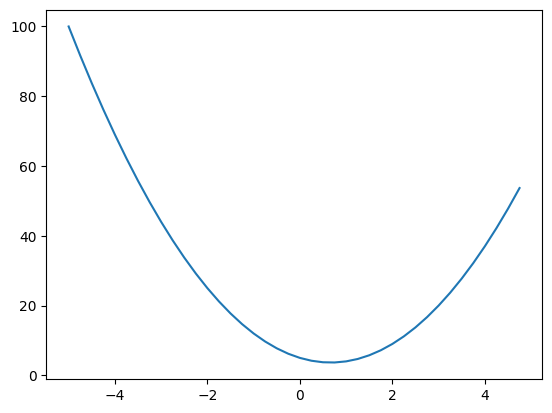

In [12]:
# plot the function f for xs
plt.plot(xs,ys)

In [14]:
# Derivative of f for x = 3

h = 0.000001
x = 3.0
(f(x+h)-f(x))/h

14.000003002223593

In [15]:
# Derivative of f for x = -3

h = 0.000001
x = -3.0
(f(x+h)-f(x))/h

-21.999997002808414

In [16]:
# Derivative of f for x = 2/3

h = 0.000001
x = 2/3
(f(x+h)-f(x))/h

2.999378523327323e-06

In [17]:
# let's get more complex function:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [18]:
# increment
h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0

# We will try to evaluate de derivative of a, b and c on point (a=2,b=-3,c=10)

# work increasing a by h
d1 = a*b + c
a+=h
d2 = a*b + c

print(d1)
print(d2)
print("slope", (d2-d1)/h)


4.0
3.997
slope -3.0000000000001137


In [19]:
# now, work increasing b by h
d1 = a*b + c
b+=h
d2 = a*b + c

print(d1)
print(d2)
print("slope", (d2-d1)/h)

3.997
3.999001
slope 2.0009999999999195


In [20]:
# now, work increasing c by h
d1 = a*b + c
c+=h
d2 = a*b + c

print(d1)
print(d2)
print("slope", (d2-d1)/h)

3.999001
4.000000999999999
slope 0.9999999999994458


In [22]:
# let's build a Value class

class Value:

    def __init__(self, data):
        self.data =  data

    def __repr__(self):                     # this method allows to represent the Value instance
        return f"Value(data={self.data})"

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0

# now we will try to sum a+ b
a + b

# This operation a+b will through out an error because the class doesn't know how to sum up these objects or instances

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

In [23]:
# let's define the add operation for the class Value

class Value:

    def __init__(self, data):
        self.data =  data

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data)
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
a + b

Value(data=-1.0)

In [24]:
# let's define the multiplication operation for the class Value

class Value:

    def __init__(self, data):
        self.data =  data

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):                   # this method is how Value class perform sum operation
        out = Value(self.data + other.data)
        return out

    def __mul__(self, other):                   # this method is how Value class perform multiplication operation
        out = Value(self.data * other.data)
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
c = Value(10.0)  # This is an instance of class Value with data = -3.0
d = a*b + c
d

Value(data=4.0)

In [25]:
# Now, let's add a value called children to keep the previous results, the values from the result comes

class Value:

    def __init__(self, data, _children = ()):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other)) # Here when the instance is created the parameter "_children" takes the value of parameter "other"
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other)) # Here when the instance is created the parameter "_children" takes the value of parameter "other"
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
c = Value(10.0)  # This is an instance of class Value with data = -3.0
d = a*b + c
d


Value(data=4.0)

In [29]:
# calling the _prev for d
d._prev
# Here below we see the previous values, where the result comes from

{Value(data=-6.0), Value(data=10.0)}

In [30]:
# now we know the values from where the result comes, but we don´t know the operation applied to these values to get the result, let´s add it:

class Value:

    def __init__(self, data, _children = (), _op = ''):   # initialy _children parameter is empty as well as _op parameter
        self.data =  data
        self._prev = set(_children)
        self._op = _op


    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out

a = Value(2.0)   # This is an instance of class Value with data = 2.0
b = Value(-3.0)  # This is an instance of class Value with data = -3.0
c = Value(10.0)  # This is an instance of class Value with data = -3.0
d = a*b + c
d


Value(data=4.0)

In [31]:
# calling the _prev
d._prev
# Here below we see the previous values from where the result come from

{Value(data=-6.0), Value(data=10.0)}

In [32]:
# calling the _op
d._op
# Here below we see the previous operation used to get the result

'+'

Now up here 👆 we have already the full Value class that allows to get the result of sum or multiplication operations, the previous values, and the operation applied.

In [33]:
# let's add labels to values for visualization purposes

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''): # initialy _children parameter is empty as well as _op parameter and label
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label                      # add a label for visualization purposes, inituially is blank, unless the instance specify a "string"


    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out



Value(data=-8.0)

In [37]:
# let's build a chain of functions:

a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
e = a * b; e.label = "e"
d = e + c; d.label = "d"
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [38]:
# We will add the gradient parameter

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty as well as _op parameter and label, grad is set zero
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0                         # grad parameter (initially is zero)

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out


In [39]:
# then
a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
e = a * b; e.label = "e"
d = e + c; d.label = "d"
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [40]:
# This block of code draws the Value object for visualization

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

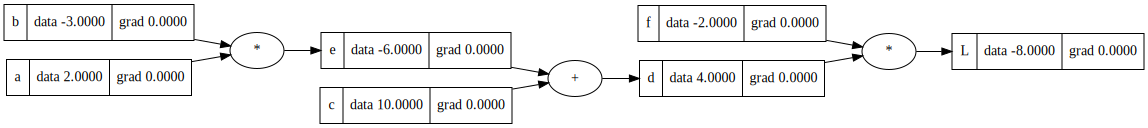

In [41]:
draw_dot(L)

# let´s calculate the gradients for each variable in the chain of functions manually:

this function lol() allow us to use the global variables locally without mess up theirs global values

In [44]:
# This is how manualy calculate de derivative of L respect to L:

def lol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data + h               # Add h to L

    print((L2-L1)/h)
    return (L2-L1)/h

L.grad = lol()                  # here assigns lol() return to grad parameter
# Of course the derivative of L respect to himself is 1

1.000000000000334


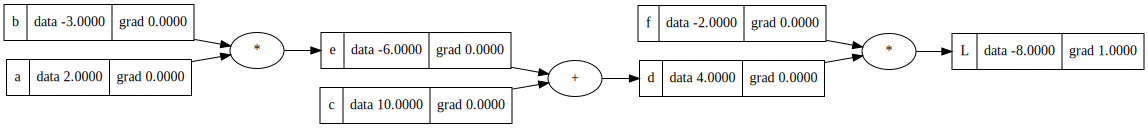

In [45]:
draw_dot(L)

In [46]:
# This is how manualy calculate de derivative of f respect to L: df/dL

def fol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0 + h, label = 'f')  # This is an instance of class Value with data = -2.0 + h
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

f.grad = fol()
# Then the derivative of f respect to L is:

3.9999999999995595


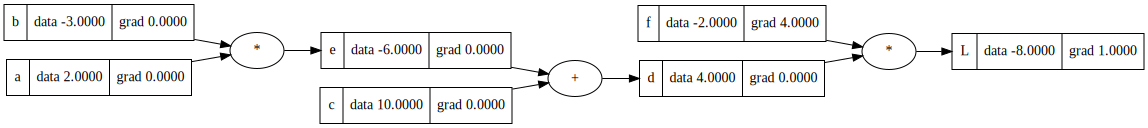

In [47]:
draw_dot(L)

In [48]:
# This is how manualy calculate de derivative of d respect to L:  dd/dl

def dol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    d.data += h                   # add h to d
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

d.grad = dol()
# Then the derivative of d respect to L is:

-2.000000000000668


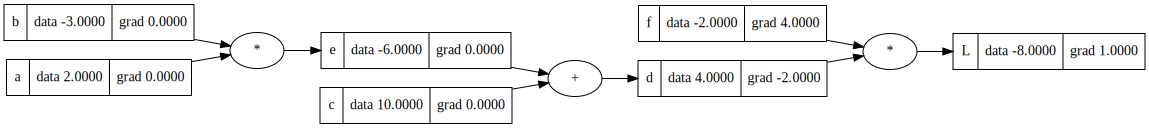

In [49]:
draw_dot(L)

In [51]:
# This is how manualy calculate de derivative of c respect to L:

def col():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0 + h, label = "c")  # This is an instance of class Value with data = -3.0 + h
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

c.grad = col()
# Then the derivative of d respect to L is:

-1.9999999999988916


This 👆 makes sense because the derivative of c respect to d in a sum (c + f = d) is 1.

"d" will change the same amount as change "c"

    dc/dd = 1
therefore:

    dc/dL = dc/dd * dd/dL

    dc/dL = 1 * dd/dL

    dc/dL = dd/dL
and, since in this example:

    dd/dL = -2
, then:

    dc/dL = -2

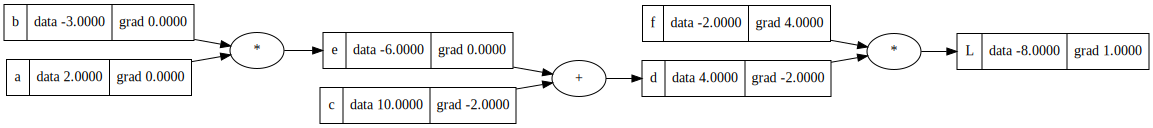

In [52]:
draw_dot(L)

In [53]:
# This is how manualy calculate de derivative of e respect to L:  de/dL = de/dd * dd/dl

def eol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    e.data += h                     # Add h to e
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

e.grad = eol()
# Then the derivative of e respect to L is:

-2.000000000000668


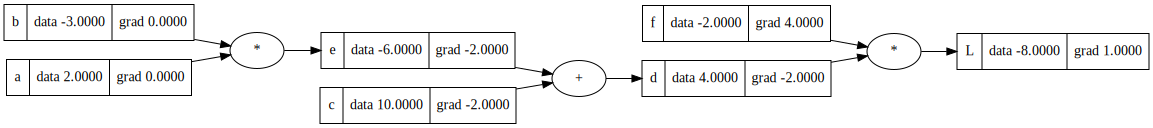

In [54]:
draw_dot(L)

In [55]:
# This is how manualy calculate de derivative of a respect to L:  da/dL

def aol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0 + h, label = "a")   # This is an instance of class Value with data = 2.0 + h
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

a.grad = aol()
# Then the derivative of a respect to L is:

6.000000000000227



This 👆 makes sense because:

    da/dL = da/de * de/dL

from before in this we know that:

    dL/de = -2

we also now that da/de in (a*b = e) is b,

    da/de = b = -3 (in this example)

then,

    da/dL = -3 * -2 = 6

the same applies to db/dL so,

    db/DL = 2 * -2 = -4



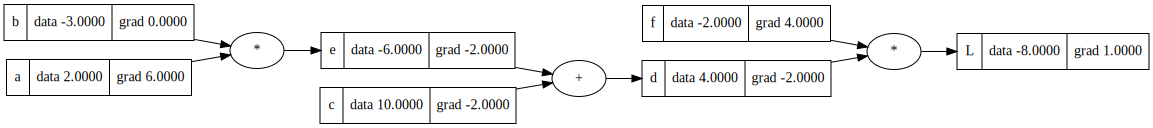

In [56]:
draw_dot(L)

In [57]:
# This is how manualy calculate de derivative of b respect to L:  db/dL

def bol():

    h = 0.001

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0, label = "b")  # This is an instance of class Value with data = -3.0
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label = "a")   # This is an instance of class Value with data = 2.0
    b = Value(-3.0 + h, label = "b")  # This is an instance of class Value with data = -3.0 + h
    c = Value(10.0, label = "c")  # This is an instance of class Value with data = -3.0
    f = Value(-2.0, label = 'f')  # This is an instance of class Value with data = -2.0
    e = a * b; e.label = "e"
    d = e + c; d.label = "d"
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)
    return (L2-L1)/h

b.grad = bol()
# Then the derivative of b respect to L is:

-3.9999999999995595


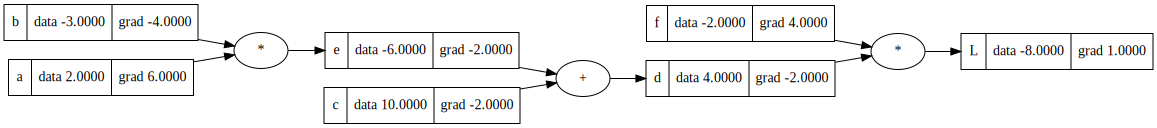

In [58]:
draw_dot(L)

We have back propagated the function, and we know how much our variables affect the result.
Let´s increase our variables a bit to check how much the result varies:  

In [59]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad
e = a * b
d = e + c
L = d * f
print (L)
# originly the result was -8

Value(data=-7.286496000000042)


# Neuron



[Neuron representation](https://www.google.com/url?sa=i&url=https%3A%2F%2Fcs231n.github.io%2Fneural-networks-1%2F&psig=AOvVaw04JESRoTPujHs_o9Ow8ipe&ust=1708252497328000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCMjA5MyWsoQDFQAAAAAdAAAAABAE)

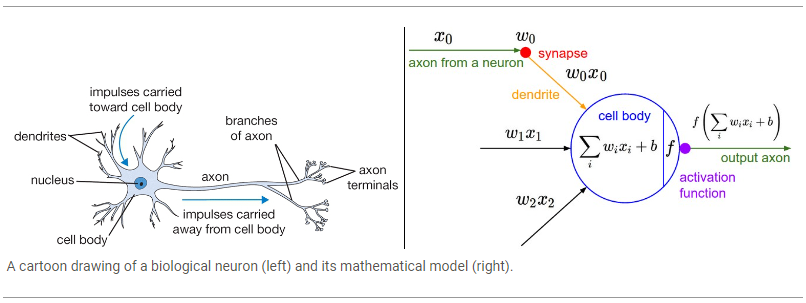



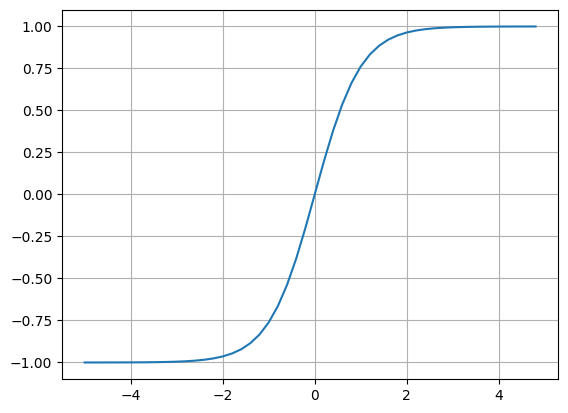

In [60]:
# Activation function sample (tanh, sigmund)

plt.plot(np.arange(-5,5,.2), np.tanh(np.arange(-5,5,.2))); plt.grid()  # tanh function as sample



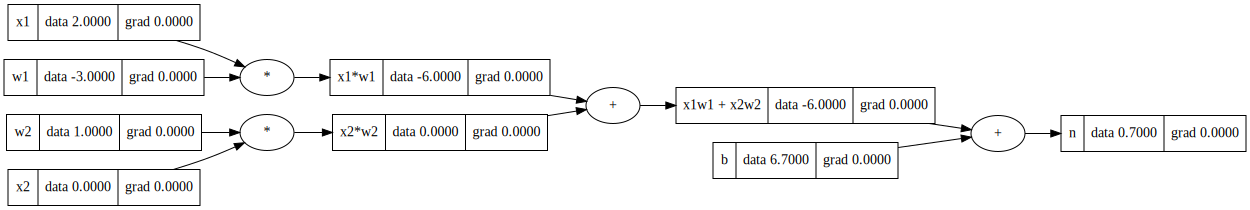

In [62]:
# Let´s make a neuron calculation with two inputs:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.7, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"


draw_dot(n)

Before to apply the activation function, we need to create it in the class Value. In this case we will use tanh.

In [63]:
# We will add the activation function tanh()

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')
        return out

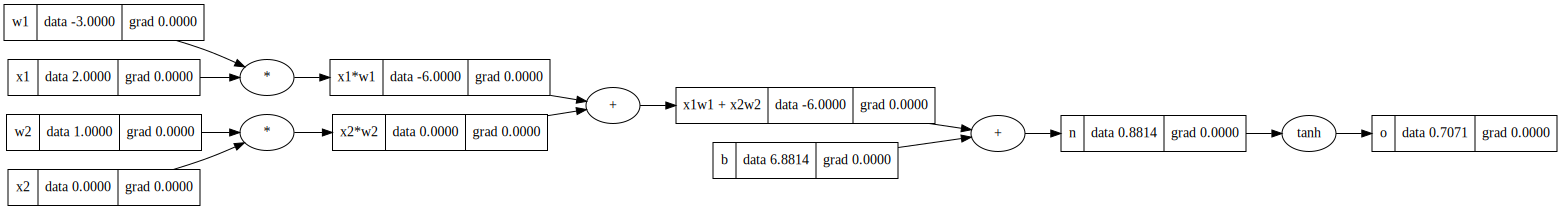

In [64]:
# Let´s make a neuron calculation with the activation function:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"


draw_dot(o)

Let´s calculate the gradients as we did above:


In [65]:
# we already know that:
o.grad = 1.0

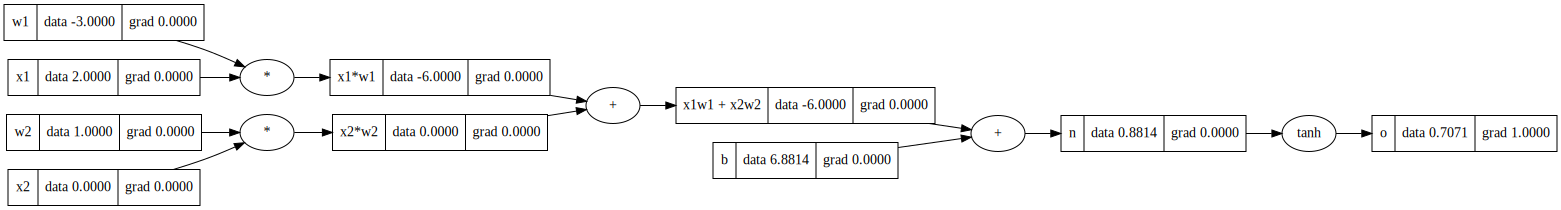

In [66]:
draw_dot(o)

the derivative of tanh() function is in this case:

    o = tanh(n)
    do/dn = 1 - o**2  

In [67]:
# Then the derivative of o in n is:
n.grad = 1 - o.data**2
n.grad



0.4999999999999999

In [68]:
# we also know that + operation in x1w1*x2w2 + o distributes the previous gradient, then the derivative of x1w1x2w2 on n is:

x1w1x2w2.grad = n.grad
b.grad = n.grad

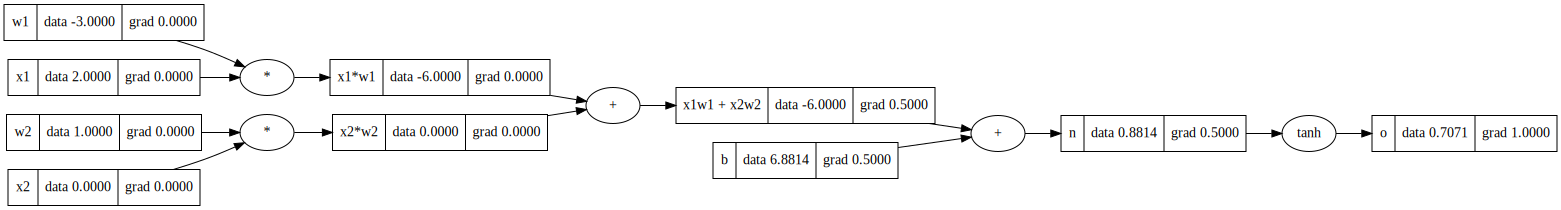

In [69]:
draw_dot(o)

In [70]:
# the same way before, the following + operation in x1*w1 + x2*w2 will distribuite the previous gradient:

x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad


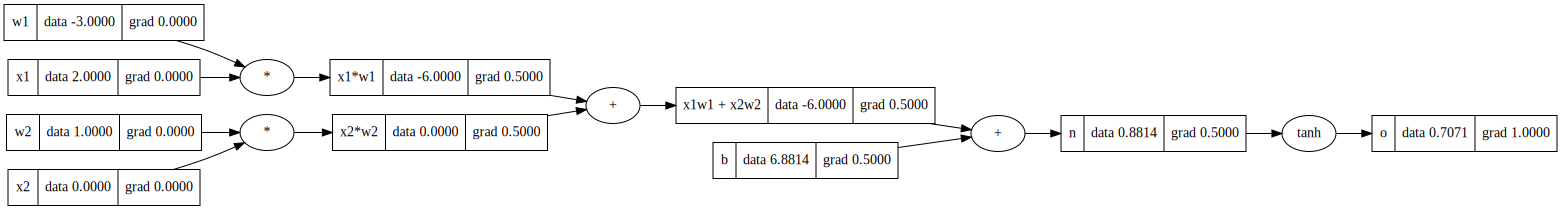

In [71]:
draw_dot(o)

In [72]:
# Let's calculate the x1, x2 , w1 and w2 gradients as we did before.
# As the operation is a * , the gradients will be:

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

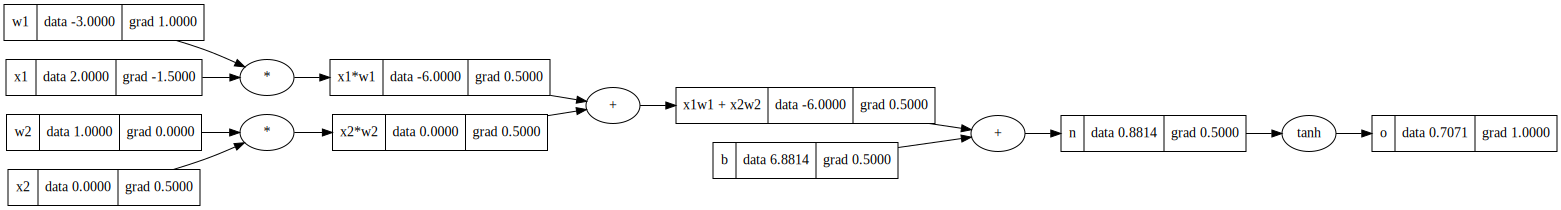

In [73]:
draw_dot(o)

According this example 👆 we can see that w2 weight (neuron 2) will not affect the result, and w1 (neuron 1) will affect the result in the same proportion  

# Backpropagation running with topological manual sort sequence.

Reset the notebook to set all the gradients to zero.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's add to the class Value a backpropagation function

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty, and _op and label are blank
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this backpropagation function is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distributes the out.gradient to the children's grads because "+"
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children's .grads in a "*"
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad    # (1-t**2) is the local gradient

        out._backward = _backward
        return out

In [3]:
# This block of code draws the Value object for visualization

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

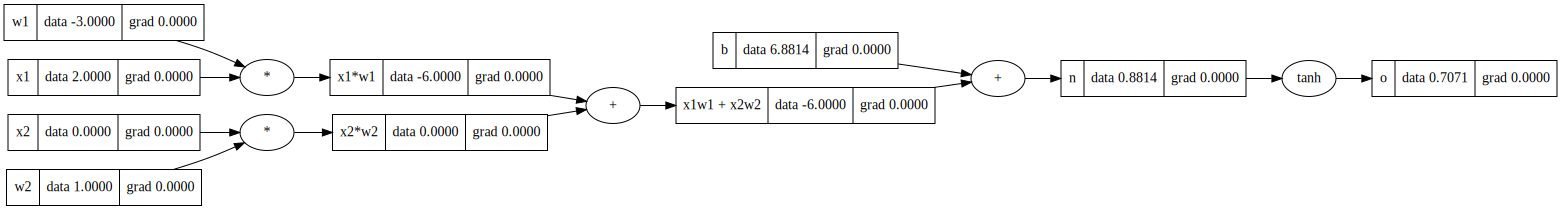

In [4]:
# Let´s set a neuron:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"


draw_dot(o)

In [5]:
# as base case, we need to initialize o.grad to 1, because otherwise will take the default value in __init__ -> o.grad= Zero
o.grad = 1

In [7]:
# This will calculate the n.grad automatically by backpropagating
o._backward()

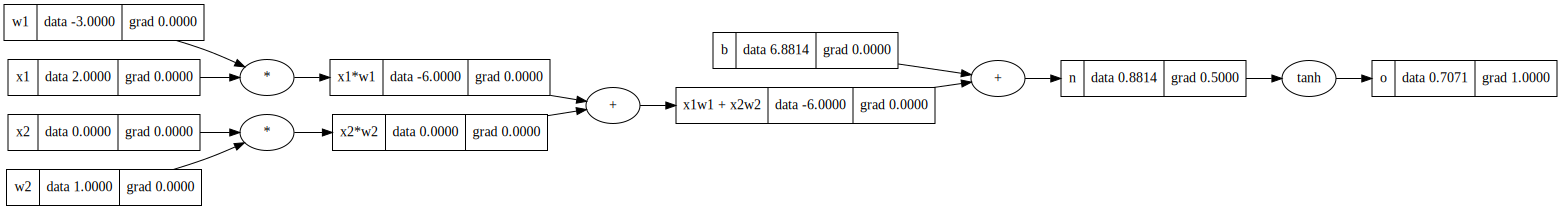

In [8]:
draw_dot(o)

In [9]:
# This will calculate the rest of .grad automatically
n._backward()
b._backward()   # This backpropagation in "b" doesn't do anything, because it hasn´t child so _backward() = None
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

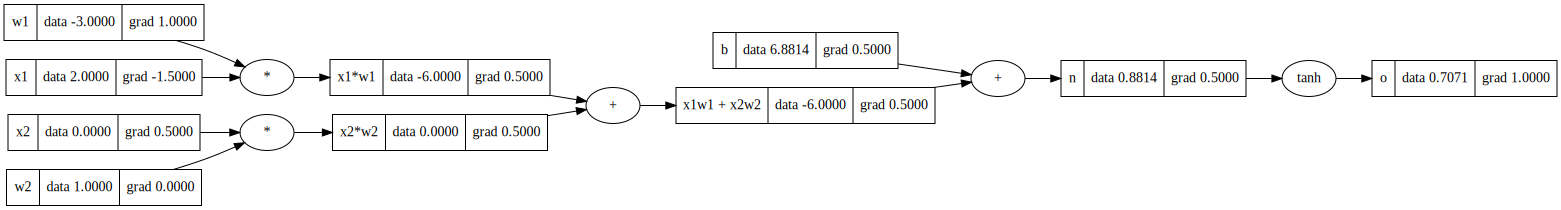

In [10]:
draw_dot(o)

## Backpropagation running with topological sort sequence.

The order of processing each node is important, because before go backward, the algorithm must go forward, and when it does backpropagation must do it in strict order.

### This is topological sort:

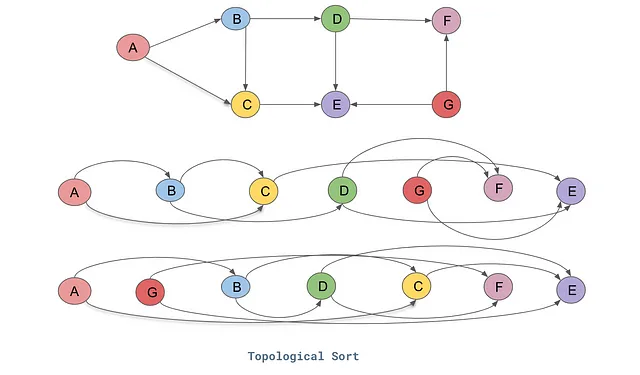

Let's define a secuence of code for the network that make a topological order list of nodes :

This code will start with the last node, it will visit its children, and finally it add itself to the topo list.

During the process, each time a child is visited, it will play the same process, then the topo list will be populated for the previous nodes and its children before ending with the father.

In [11]:
topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
visited = set()                 # set of already visited nodes by the algorithm
def build_topo(v):              # function to populate topo list in topological sort
    if v not in visited:        # if "v" is not in visited set:
        visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
        for child in v._prev:   # iterates over its childrens
            build_topo(child)   # apply the same function to each child
        topo.append(v)          # once all its children and grand...children were processed, add "v" to the topo list.



In [12]:
# Let's apply the above code to our neuron

build_topo(o)         # apply build_topo(v) starting in "o"
for node in topo:     # iterates over nodes on topo list in reverse order
    print (node.label, f' = {node.data}')
# This below is the topo list of our network sample:

b  = 6.881373587019543
w1  = -3.0
x1  = 2.0
x1*w1  = -6.0
x2  = 0.0
w2  = 1.0
x2*w2  = 0.0
x1w1 + x2w2  = -6.0
n  = 0.8813735870195432
o  = 0.7071067811865476


In [14]:
# Now lets apply the _backward function to the nodes in the list. It will start in "o" (the father)

o.grad = 1    # We will set o.grad = 1, otherwise it would take the __init__ value that is zero.

for node in reversed(topo):     # iterates over nodes on topo list in reverse order
    print (node.label, f'.grad = {node.grad}')
    node._backward()            # apply _backward function to each node to find the node.grad of each child

o .grad = 1
n .grad = 0.4999999999999999
x1w1 + x2w2 .grad = 0.4999999999999999
x2*w2 .grad = 0.4999999999999999
w2 .grad = 0.0
x2 .grad = 0.4999999999999999
x1*w1 .grad = 0.4999999999999999
x1 .grad = -1.4999999999999996
w1 .grad = 0.9999999999999998
b .grad = 0.4999999999999999


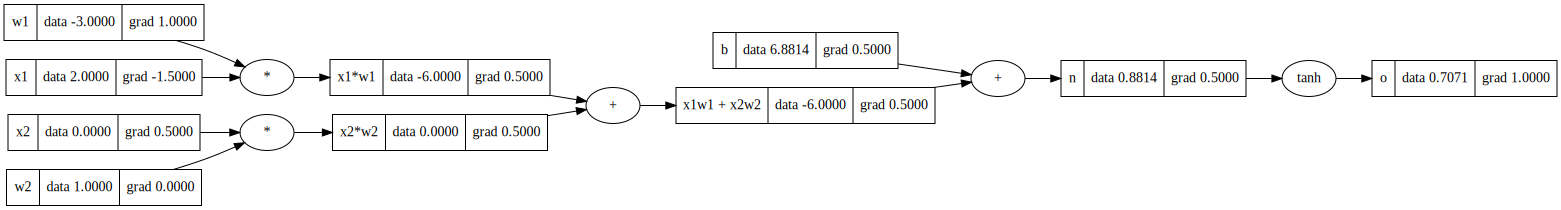

In [15]:
draw_dot(o)

Let's incorpotate the backward function with the topografic sort into the Value class

In [16]:
# let's add to the class Value a backpropagation function:

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty, and _op and label are blank
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()



In [ ]:
#This block of code draws the Value object for visualization

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

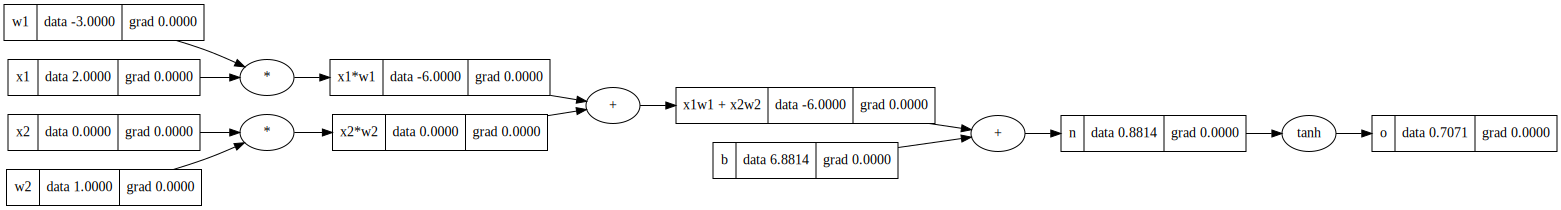

In [17]:
# Let´s set a neuron:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"


draw_dot(o)

In [18]:
# let´s backpropagate to find all the gradients:
o.backward()

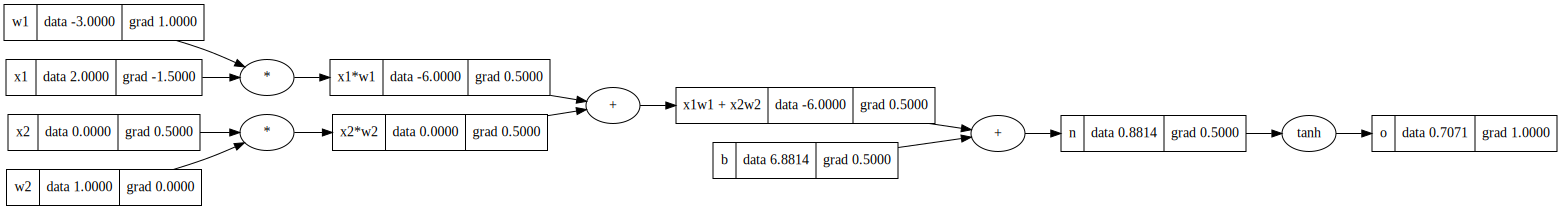

In [19]:
# let's draw the schema with the gradients just calculated:
draw_dot(o)

There are some problems with this Value class as we have defined if variables are used more than one time:

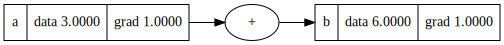

In [20]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'

b.backward()

draw_dot(b)

Here above 👆 the a.grad should be 2, but it is shown 1.

In this case below 👇 the a and b gradients are wrong.

This is because the gradient is define each time a variable is used, when a variable is used more than one time, the gradient is overwriten, when it should be sum to the previous one.

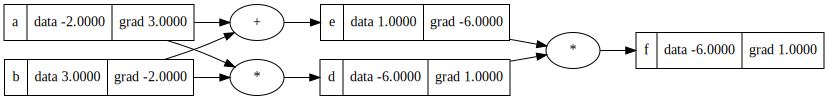

In [21]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [22]:
# let's modify this into the class Value. We replace "=" by "+=" for each .grad calculation for each _backward function

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty, and _op and label are blank
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

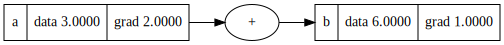

In [23]:
# Now lets try the exercise again:

a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'

b.backward()

draw_dot(b)


Now, here above 👆 the a.grad should be 2, and it is shown 2. then is OK

In this case below 👇 the a and b gradients are now OK.

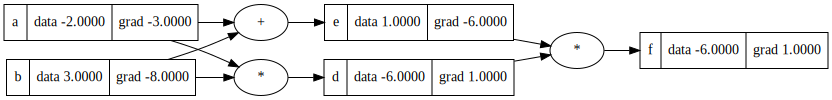

In [24]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

This is a second problem:
We willl get an error if we want to perform operation between Class objects and numbers.

In [25]:
a = Value(2.8)
a + 1

# This will rise an error because 1 is not a Value class object or instance.
# We need to define in the class what to do with numbers

AttributeError: 'int' object has no attribute 'data'

In [27]:
# The same happens with the "*"
a = Value(2.8)
a * 2

# This will rise an error as well because 2 is not a Value class object or instance.
# We need to define in the class what to do with numbers

AttributeError: 'int' object has no attribute 'data'

In [29]:
# let's solve these problems into the class Value:

class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty, and _op and label are blank
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it.
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [30]:
# now let's check again the "+" operation:

a = Value(2.8)
a + 1


Value(data=3.8)

In [31]:
# now let's check again the "*" operation:
a = Value(2.8)
a * 2

Value(data=5.6)

In [32]:
# Although "*" seems to work, if the expression is this:

2 * a

# It rises an error, because Python does :

#   a*2
#   a.__mul__Value(2)   # this works

#   2 * a
#   2.__mul__Value(a)    # this doesn't work

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [ ]:
# to solve this we add to the Value class a function that tries the operation, and if don't works, it swaps the operands
# this function is called __rmul__()

# def __rmul__(self, other): # other * self
#    return self*other

# the same way, we add __radd__ to swap operands in a sum between a number and a value object
# def __radd__(self, other):  # other + self
#        return self + other


In [33]:
# let's add __rmul__ and __radd__ to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):     # If other is not a instance of Value Class, then it instiantes it.
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # it tries the operation, and if don't works, it swaps the operands to other + self
        return self + other

    def __rmul__(self, other):  # it tries the operation, and if don't works, it swaps the operands to other * self
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()


In [34]:
# Let try the sample

a = Value(2.8)
2 * a

Value(data=5.6)

In [35]:
# let's add the exponentiation to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # If other is not a instance of Value Class, then it instiantes it.
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it.
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()


In [36]:
a = Value(2.8)
a.exp()

Value(data=16.444646771097048)

In [37]:
# let try to check if value class works with divition:

a = Value(2.8)
b = Value(2)
a/b

# This rise an error because divition is not included in the class Value

TypeError: unsupported operand type(s) for /: 'Value' and 'Value'

instead of use division operation, we will consider a wider operation:

"a / b" can be expressed as "a * (1/b)" and, "a * (b**-1)"

We will built a function for b**k , where if k = -1 , it is a division.

In [38]:
# let's add the divition to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):   # If other is not a instance of Value Class, then it instiantes it.
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it.
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only works for power of integer or float"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):   # self / other
        return self * other**-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [39]:
# Now division works
a = Value(2)
b = Value(4)
a / b

Value(data=0.5)

In [40]:
# let's add the substraction and negative to the class Value:
class Value:

    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data =  data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None     # Initialy this is an empty function

    def __repr__(self):                         # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():    # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class, then it instiantes it
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad´s in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only works for power of  integer or float"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):   # self / other
        return self * other**-1

    def __neg__(self):      # -self
        return self * -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # (1-2**t) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm
        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [41]:
# let's try a substration with negative numbers

a = Value(4)
b = Value(-6)

a-b


Value(data=10)

Now let's replace the tanh function by it equivalent:

    tanh (x) = e**2x - 1 / e**2x + 1

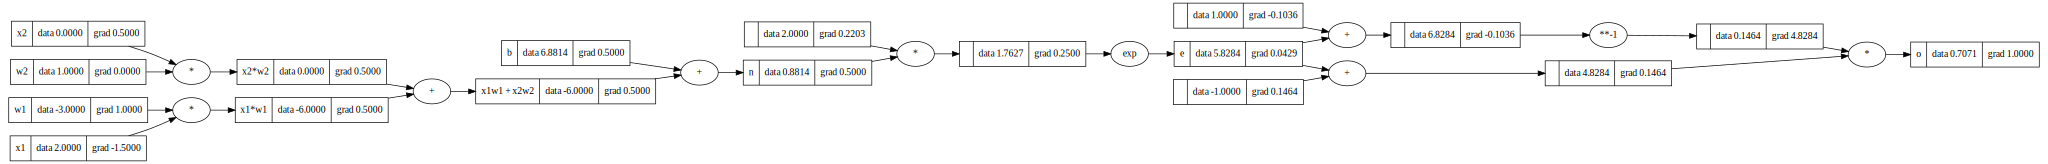

In [44]:
# Let´s set a neuron:

# inputs x1, x2
x1 = Value(2.0, label = "x1")
x2 = Value(0.0, label = "x2")

# weight w1, w2
w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

# bias of neuron b
b = Value(6.8813735870195432, label = "b")

#x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
# ---------------------------
# o = n.tanh(); o.label = "o"
#----------------------------
e = (2*n).exp(); e.label = "e"
o = (e - 1) / (e + 1); o.label = "o"

o.backward()

draw_dot(o)

## Backpropagation using Pytorch library

Let´s build the same neuron with pytorch: comparison

the equivalent code to our neuron definition is:

In [45]:
import torch

In [46]:
# neuron inputs:
x1 = torch.Tensor([2.0]).double() # torch works with tensors, and it has to be double precission to match Python default dtype
x1.requires_grad = True         # set to get the gradiant
x2 = torch.Tensor([0.0]).double()
x2.requires_grad = True

# neuron weight:
w1 = torch.Tensor([-3.0]).double()
w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()
w2.requires_grad = True

# neuron bias:
b = torch.Tensor([6.8813735870195432]).double()
b.requires_grad = True

# x1*w1 + x2*w2 + b
n = (x1 * w1 + x2 * w2) + b

# activation function:
o = torch.tanh(n)

print(o.data.item())    # the item() takes-out the tensor and returns just the value
o.backward()            # calls the backpropagation function

print("------------")
print("x1   ", x1.grad.item())
print("x2   ", x2.grad.item())
print("w1   ", w1.grad.item())
print("w2   ", w2.grad.item())
print("b    ", b.grad.item())


0.7071066904050358
------------
x1    -1.5000003851533106
x2    0.5000001283844369
w1    1.0000002567688737
w2    0.0
b     0.5000001283844369


In [47]:
# here an explanation because we need to set dtype for tensor as double float precisson:

# by default pytorch works with dtype simple for tensors
x1 = torch.tensor([-3.0])
print("x1 data type with default pytorch float precission -> ", x1.dtype)

# while python works by default
x2 = (1.0)
print ("x2 data type with default python float precission -> ", type(x2), " in python, float is 64 bits")

# then we need to set the dtype for tensors to double to uniform
x1 = torch.tensor([-3.0]).double()
print("x1 data type with double float precission -> ", x1.dtype)

x1 data type with default pytorch float precission ->  torch.float32
x2 data type with default python float precission ->  <class 'float'>  in python, float is 64 bits
x1 data type with double float precission ->  torch.float64


In [48]:
# we can call the object "o" to check its elements

o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [49]:
o.item()

0.7071066904050358

In [50]:
o.dtype

torch.float64

In [51]:
o.grad_fn

## Neural nets

Building out a neural net library (multi-layer perceptron) in micrograd

In [52]:
import random

In [53]:
# How does __call__ function works:

class Neuron:

    def __init__(self, nin):                                        # nin is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)]   # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))                        # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        return 0.0


In [54]:
# this is how __call__ works:

x = [2.0,3.0]   # define the x tensor
n = Neuron(2)   # make an instance of Neuron class with two inputs called n
n(x)            # when I call the n instance automatially execute the __call__()

# the return in this case would be 0.0

0.0

In [55]:
class Neuron:

    def __init__(self, nin):                                        # nin is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)]   # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))                        # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b  # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)     # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

In [56]:
# let's try it
x = [2.0,3.0]   # define the x tensor
n = Neuron(2)   # make an instance of Neuron class with two inputs called n
n(x)
# the forward propagation pass result is:

Value(data=-0.8409623787611852)

## building out a neural net library (multi-layer perceptron) in micrograd

In [57]:
class Neuron:

    def __init__(self, nin):                                        # nin is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)]   # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))                        # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b  # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)     # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

# Let build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):                          # nin is the number of inputs a neuron has, nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]   # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs

In [58]:
# lets try to build a layer with 2 inputs and 3 outputs
x = [2.0,3.0]       # define the x tensor
n = Layer(2, 3)     # make an instance of Layer class with two inputs and 3 outputs called n
n(x)
# the forward propagation pass result is:

[Value(data=0.804119049056245),
 Value(data=-0.07211183580397391),
 Value(data=0.9978223724524606)]

In [62]:
class Neuron:

    def __init__(self, nin):                                        # nin is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)]   # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))                        # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b  # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)     # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

# Let's build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):                          # nin is the number of inputs a neuron has, nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]   # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs[0] if len(outs) == 1 else outs

# Let's build a MLP (multi layer perceptron):

class MLP:

    def __init__(self, nin, nouts):                                         # nin is the number of inputs a neuron has, nouts is a list of sizes of all the layers we want
        sz = [nin] + nouts                                                  # we put all sizes together
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]    # we iterate over the list sizes in consecutive paires to apply Layer class

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x



### let's try to build this MLP (Multi-Layer Perceptron):
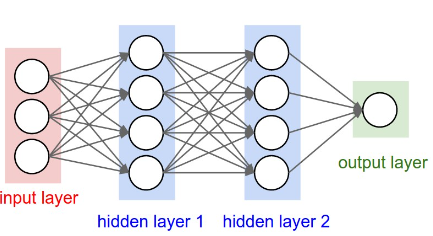

In [65]:
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]    # define the x tensor
n = MLP(3, [4, 4, 1])   # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

# the forward propagation pass result is:

Value(data=0.197260065977742)

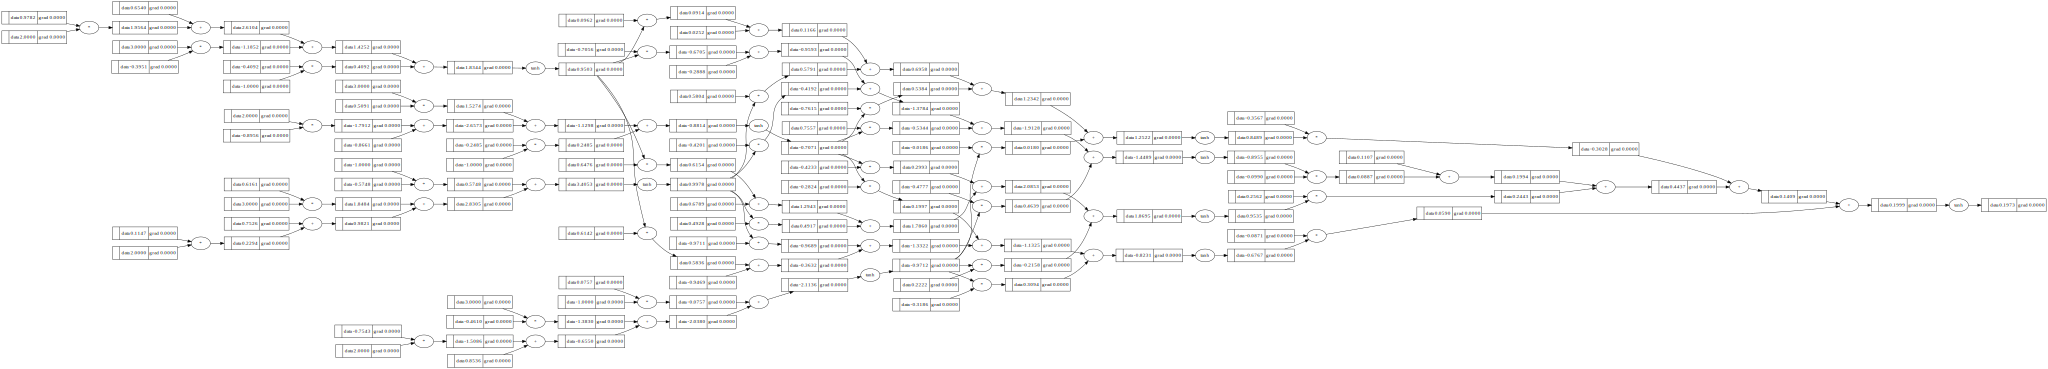

In [66]:
draw_dot(n(x))

## Creating a tiny dataset, writing the loss function

In [67]:
# inputs
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 0]  # desired targets

# forward propagation:
ypred = [n(x) for x in xs]
ypred

[Value(data=0.197260065977742),
 Value(data=0.16834297004626436),
 Value(data=0.2249525420693376),
 Value(data=0.20857084384222346)]

The predictions 👆 are not too good.
In order to evaluate how good are the predictions, we use a function called loss, which returns just one number, the closest the loss is to zero, the better the predictions are.

In [68]:
# This the loss function
loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))
loss
# This is the value of loss function:

Value(data=3.553427224553775)

In [69]:
# Applying the backpropagation to this loss function, to get all the gradients

loss.backward()

In [70]:
# a specific gradient can be called by:

n.layers[0].neurons[0].w[0].grad

# In this case we are accessing to the gradient of the first input of the first neuron from the first layer of the MLP.

0.013167731401780373

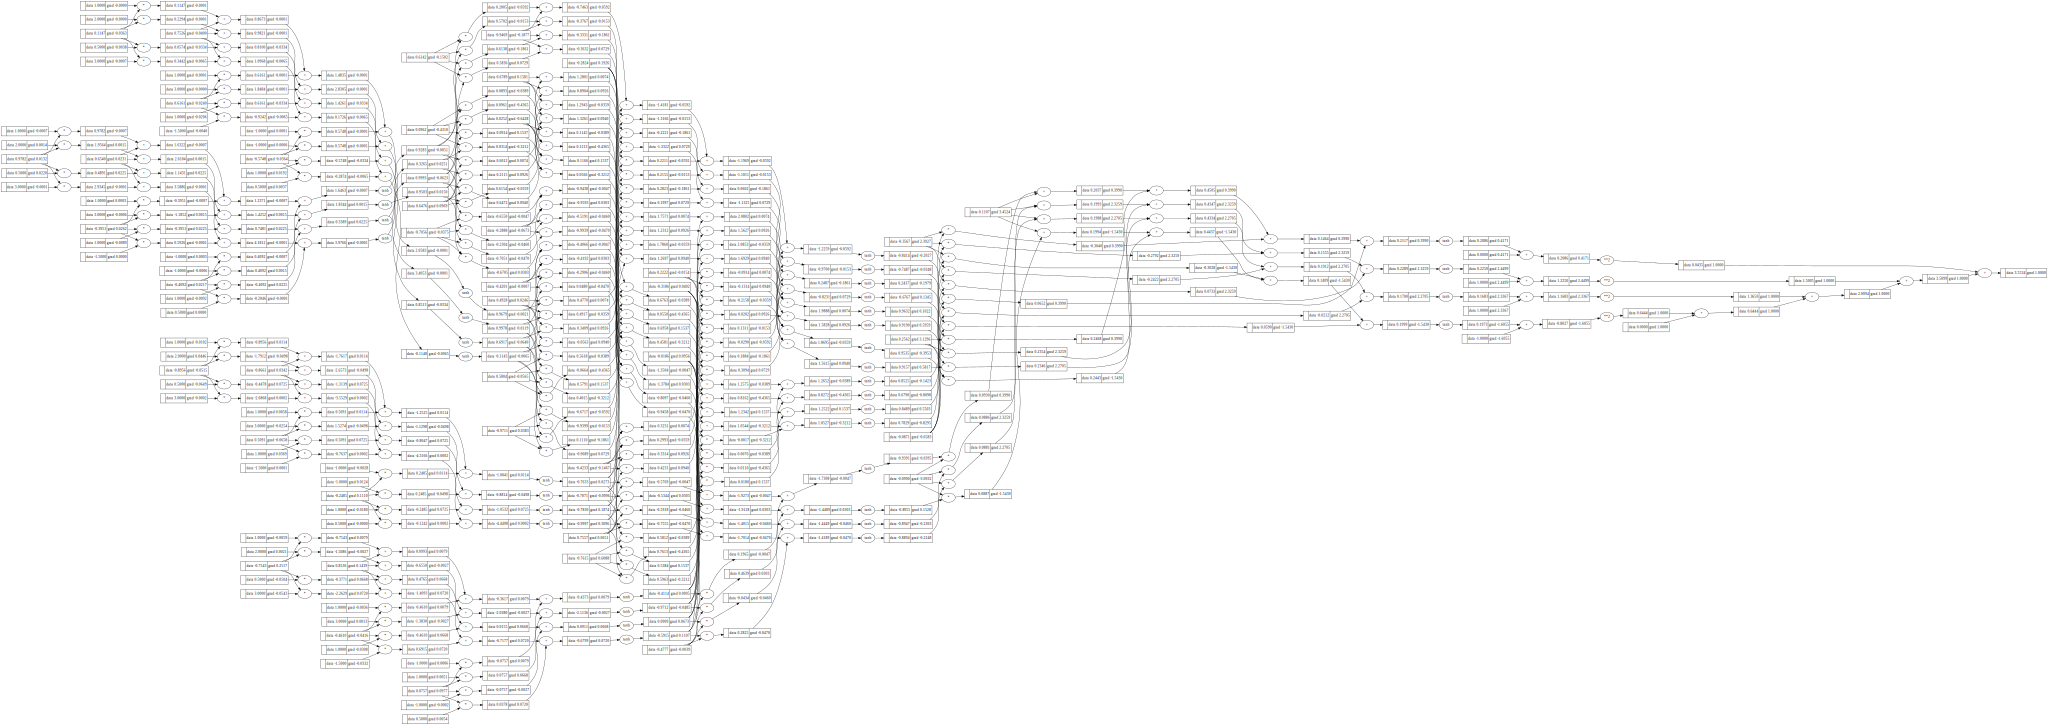

In [71]:
# we can draw the function loss:
draw_dot(loss)

For instance, if

    loss = Value(data=2.805669240486392)

we know that we have to reduce it value, then we need a negative gradiente to approch zero.

if

    n.layers[0].neurons[0].w[0].grad =  -0.7663223714134588

the gradient is negative, so its influence on the loss will be also negative.

thanks to backpropagation, we know all the gradients of every single neuron in the MLP.

Unfortunately, the inputs are fix, because they are given with the problem, we can't change them to improve the loss, but the weights and biases of neuros on the hidden layers can be modified.



In [ ]:
# Let's make a code to collect all the parameters of the NN in a way we can change them accordingly what we need.
# this code will be added to the Neuron class

In [74]:
class Neuron:

    def __init__(self, nin):    # ini is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)] # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))         # creates a bias for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b    # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b) # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

    def parameters(self):
        return self.w + [self.b]    # this will return a list of weights and the bias for the neuron

# Let's build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):   # nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]  # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]  # this will return a list of weights and the bias for the layer
    # This code above is equivalent the code below:
        # params = []
        # for neurons in self.neurons:
        #     ps = neurons.parameters()
        #     params.extend(ps)
        # return params

# Let's build a MLP (multi layer perceptron):

class MLP:

    def __init__(self, nin, nouts):                                         # nouts is a list of sizes of all the layers we want
        sz = [nin] + nouts                                                  # we put all sizes together
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]    # we iterate over the list sizes in consecutive paires to apply Layer class

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]     # this will return a list of weights and the bias for the MLP

In [76]:
# lets build a MLP
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]    # define the x tensor
n = MLP(3, [4, 4, 1])   # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

# the forward propagation pass result is:

Value(data=-0.46080205883369296)

In [77]:
n.parameters()   # These are the total parameters of the MLP

[Value(data=0.0004179376719852801),
 Value(data=0.7555444524134465),
 Value(data=-0.20719788024732577),
 Value(data=0.021031407324083817),
 Value(data=-0.5913854597456654),
 Value(data=0.17650227458306267),
 Value(data=-0.9041032109091687),
 Value(data=0.3624786448547652),
 Value(data=-0.8101599227626026),
 Value(data=0.49056721466131203),
 Value(data=0.9543390475969167),
 Value(data=0.4636068800563917),
 Value(data=-0.031001491770203726),
 Value(data=0.07302093732957626),
 Value(data=-0.8192789784531651),
 Value(data=-0.1601519341382056),
 Value(data=0.5053004844921283),
 Value(data=-0.240834046325076),
 Value(data=0.1608373871449944),
 Value(data=-0.9899521296847682),
 Value(data=0.05415348233645978),
 Value(data=-0.5784979283966256),
 Value(data=-0.7113739206384073),
 Value(data=0.47258139415282696),
 Value(data=0.7108007406836929),
 Value(data=-0.4670089422103285),
 Value(data=-0.8657310348326506),
 Value(data=-0.8259182625975896),
 Value(data=-0.6160566824900076),
 Value(data=-0.2

In [78]:
len(n.parameters())   # These are the total number of parameters in the MLP

41

In [79]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 0]  # desired targets

# forward propagation:
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.46080205883369296),
 Value(data=-0.6706642752508659),
 Value(data=-0.5694227911188972),
 Value(data=-0.45449650968831545)]

In [80]:
# This the loss function
loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))
loss
# This is the value of loss function:

Value(data=2.6343684848154956)

In [81]:
loss.backward()

In [82]:
n.layers[0].neurons[0].w[0].grad   # this is the gradiant of this input

0.0999927641006369

In [83]:
n.layers[0].neurons[0].w[0].data   # this is the value of this input

0.0004179376719852801

In [84]:
# now we will change the data for all the neurons in the MLP

for p in n.parameters():     # for all the parameters
    p.data += -0.01 * p.grad  # will change the data slightly in a oposite (negative) direction of the gradient. Because we want the loss decrece.


In [85]:
# now the data of this neuron should have change a bit
n.layers[0].neurons[0].w[0].data   # this is the value of this input

-0.0005819899690210888

In [86]:
# forward propagation with the new data:
ypred = [n(x) for x in xs]
ypred

# Calculate the new loss
loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))
loss
# This is the value of loss, closer to Zero. Great!


Value(data=2.205119709505697)

In [87]:
# we can check that predictions should be closer to the target
ypred

[Value(data=-0.3394881755545197),
 Value(data=-0.6768555685940324),
 Value(data=-0.565819670808721),
 Value(data=-0.3434476018987293)]

In [ ]:
# now we have to iterate these steps several times until reach loss = Zero

# Forward step
# Backward step
# update data

Let´s build a loop function for the gradiant descendent function:

In [88]:
# let's build a MLP
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]    # define the x tensor
n = MLP(3, [4, 4, 1])   # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

Value(data=-0.3707149658023515)

In [89]:
# Let's reset the inputs and targets
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 1.0]  # desired targets

In [90]:
# gradiant descendent function:

for k in range(20):
    # forward pass
    ypred = [n(x) for x in xs]

    # loss evaluation
    loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))

    # backward pass
    for p in n.parameters():
        p.grad = 0              # reset all the grad to zero before calculate them again, otherwise they accumulate themself
    loss.backward()

    # update
    for p in n.parameters():     # for all the parameters
        p.data += -0.05 * p.grad

    print (k, loss.data)


0 4.33277043724363
1 2.9539742994615086
2 2.177609134653856
3 1.3868361617117533
4 0.47487148783212196
5 0.21364942117132968
6 0.16011593433987595
7 0.12713023466427242
8 0.10494062776798241
9 0.0890837281384912
10 0.07723183584382885
11 0.06806144455125784
12 0.06076857494339323
13 0.054838463904499056
14 0.04992711152820102
15 0.045796336352906045
16 0.04227623257696205
17 0.03924247964282698
18 0.03660209816921881
19 0.03428421098463791


In [91]:
ypred   # it should be quite good if the trainning was ok

[Value(data=0.9128091733260649),
 Value(data=-0.9026768642060123),
 Value(data=-0.9152795680216201),
 Value(data=0.8998370009775293)]

In [ ]:
# These are the weight for the MLP trainned:

n.parameters()

# Final code

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _children = (), _op = '', label = ''):   # initialy _children parameter is empty
        self.data =  data
        self.grad = 0.0
        # internal variables used for autograd graph construction
        self._prev = set(_children)
        self._op = _op                  # the op that produced this node, for graphviz / debugging / etc
        self.label = label
        self._backward = lambda: None   # Initialy this is an empty function

    def __repr__(self):                 # this function is for nice python representation when it prints out in the comand line
        return f"Value(data={self.data}, grad= {self.grad})"

    def __add__(self, other):   # function to sum two Value Class Objects (self + other)
        other = other if isinstance(other, Value) else Value(other)  # If other is not a Value Class Object, it instanciates
        out = Value(self.data + other.data, (self, other), '+')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '+'

        def _backward():        # This function distribute the out.gradient to the children.grad´s. because "+"
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward   # this line set the lambda function for _backward
        return out

    def __mul__(self, other):   # function to multiply two Value Class Objects (self * other)
        other = other if isinstance(other, Value) else Value(other)  # If other is not a instance of Value Class it instanciates
        out = Value(self.data * other.data, (self, other), '*')
        # up here when the instance is created the parameter "_children" takes the value of parameter "other"
        # and the parameter "_op" takes the value '*'

        def _backward():   # This function calculates the children.grad in a "*""
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad

        out._backward = _backward
        return out

    def __pow__(self, other):   # function to power Value Class Objects self by other(int, float)
        assert isinstance(other, (int, float)), "only works for power of integer or float"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad

        out._backward = _backward
        return out

    def __radd__(self, other):  # other + self
        return self + other

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):   # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def __neg__(self):      # -self
        return self * -1

    def __sub__(self, other):  # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def tanh(self):      # function to calculate tanh() of a Value Class Objects (self)
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad    # (1-t**2) is the local gradient

        out._backward = _backward
        return out

    def exp(self):      # function to calculate exp() of a Value Class Objects (self)
        x = self.data
        out = Value(math.exp(x),(self,),'exp')

        def _backward():
            self.grad += out.data * out.grad    # exp(x) is the local gradient

        out._backward = _backward
        return out

    def backward(self):
        topo = []                       # create an empty list of nodes (it will filled with nodes in topological sort)
        visited = set()                 # set of already visited nodes by the algorithm

        def build_topo(v):              # function to populate topo list in topological sort
            if v not in visited:        # if "v" is not in visited set:
                visited.add(v)          # mark "v" as visited. Add "v" to the visited set.
                for child in v._prev:   # iterates over its childrens
                    build_topo(child)   # apply the same function to each child
                topo.append(v)

        build_topo(self)                # build the topological list of nodes

        self.grad = 1
        for node in reversed(topo):     # iterates over nodes on topo list in reverse order
            node._backward()

In [ ]:
class Neuron:

    def __init__(self, nin):                                        # nin is the number of inputs a neuron has
        self.w = [Value(random.uniform(-1,1))for _ in range(nin)]   # create a weight between -1 and 1 for each input
        self.b = Value(random.uniform(-1,1))                        # creates a bias between -1 and 1 for the neuron

    def __call__(self, x):
        # x * w + b
        # act = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b  # mutiply each x and w and sum the bias
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)     # this expression is equal to the one above, but more efficient
        out = act.tanh()                                            # apply the activation function

        return out

    def parameters(self):
        return self.w + [self.b]    # it returns a list of weights and the bias for the neuron

# Let's build the layer class to build layers with nin inputs and nout outputs:

class Layer:

    def __init__(self, nin, nout):                          # nin is the number of inputs a neuron has, nout is the number of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)]   # list a neurons

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]

        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]  # it returns a list of weights and the bias for the layer
    # This code above is equivalent the code below:
        # params = []
        # for neurons in self.neurons:
        #     ps = neurons.parameters()
        #     params.extend(ps)
        # return params

# Let's build a MLP (multi layer perceptron):

class MLP:

    def __init__(self, nin, nouts):                                         # nin is the number of inputs a neuron has, nouts is a list of sizes of all the layers we want
        sz = [nin] + nouts                                                  # we put all sizes together
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]    # we iterate over the list sizes in consecutive paires to apply Layer class

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]     # it returns a list of weights and the bias for the MLP

In [ ]:
# lets build a MLP
# the MLP has 3 inputs and 2 hidden layers of 4 neuros and 1 output.

x = [2.0, 3.0, -1.0]    # define the x tensor
n = MLP(3, [4, 4, 1])   # make an instance of MLP class with 3 inputs, 2 layers of 4 neurons and 1 output called n
n(x)

Value(data=-0.519815641352067, grad= 0.0)

In [ ]:
# Let's reset the inputs and targets
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.5, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0 , 1.0]  # desired targets

In [98]:
# gradiant descendent function:

loops = 100 # quantity of loops
h = -0.05   # data variation

for k in range(100):            # quantity of loops

    # forward pass
    ypred = [n(x) for x in xs]

    # loss evaluation
    loss = sum((ypi - ysi)**2 for ypi, ysi in zip(ypred, ys))

    # backward pass
    for p in n.parameters():
        p.grad = 0              # reset all the grad to zero before calculate them again, otherwise they accumulate themself
    loss.backward()

    # update
    for p in n.parameters():     # for all the parameters
        p.data += h * p.grad

    print (k, loss.data)

0 0.03223387763137939
1 0.030407875865514723
2 0.028771750843178484
3 0.027297710030605517
4 0.025963094730556937
5 0.024749252502415157
6 0.023640693266487794
7 0.022624449393070425
8 0.02168958462576747
9 0.020826813060967505
10 0.020028200514700764
11 0.01928692826667833
12 0.01859710452867517
13 0.017953612782980098
14 0.01735198886388412
15 0.0167883206361863
16 0.01625916557934757
17 0.015761482664961392
18 0.015292575723256638
19 0.014850046104875742
20 0.01443175290934286
21 0.014035779408866172
22 0.013660404572504222
23 0.013304078811072994
24 0.012965403232081625
25 0.012643111827310032
26 0.012336056121515504
27 0.012043191895304896
28 0.011763567663101335
29 0.011496314641930115
30 0.01124063799119637
31 0.010995809139845797
32 0.01076115904695346
33 0.010536072266161399
34 0.010319981704512527
35 0.010112363982907702
36 0.009912735319290796
37 0.009720647867255138
38 0.009535686452473501
39 0.009357465657520238
40 0.009185627212538303
41 0.00901983765503283
42 0.008859786

In [99]:
# we can check that predictions "ypred" should be closer to the target "ys"

print(f'target = ',ys)          # predicted target

print(f'predictions = ',ypred)  # it should be quite good if the trainning was ok

target =  [1.0, -1.0, -1.0, 1.0]
predictions =  [Value(data=0.9690829745388233), Value(data=-0.9635677394129545), Value(data=-0.9706733879815442), Value(data=0.965075656080464)]


In [97]:
# These are the weight for the MLP trainned:
n.parameters()

[Value(data=0.49401252729640505),
 Value(data=0.7625107278422361),
 Value(data=-1.0115866287645985),
 Value(data=-0.44885301683653217),
 Value(data=0.4111662965197303),
 Value(data=-0.7989406483212944),
 Value(data=-0.41504672774506424),
 Value(data=-0.1424907408301856),
 Value(data=0.05213988143711964),
 Value(data=-0.0026030173264931997),
 Value(data=0.9944651331899489),
 Value(data=-0.02137966273179079),
 Value(data=1.0010517665129293),
 Value(data=0.7992354883306857),
 Value(data=0.19274647304547599),
 Value(data=-0.23441221595911785),
 Value(data=0.7383506132047147),
 Value(data=-0.5086785875214205),
 Value(data=-0.5717841914044168),
 Value(data=-0.3267278543430528),
 Value(data=-0.11718427890426955),
 Value(data=-0.9096136815982904),
 Value(data=-0.5079436237664503),
 Value(data=-0.10551071886791154),
 Value(data=0.8290841363137155),
 Value(data=-0.5931498556546203),
 Value(data=-0.8422698545288422),
 Value(data=-0.8736173557160345),
 Value(data=-0.5257911987718249),
 Value(data=